___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [2]:
Heart_Stroke_Prediction = pd.read_csv("heart.csv")
df = Heart_Stroke_Prediction.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [3]:
df.cp.unique()

array([3, 2, 1, 0], dtype=int64)

In [4]:
df.thal.unique()

array([1, 2, 3, 0], dtype=int64)

In [5]:
df.target.unique()

array([1, 0], dtype=int64)

# EDA

In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.oldpeak.unique() # i checked float feature for NaN

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


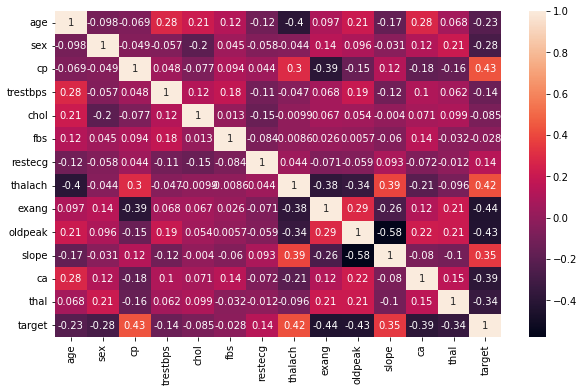

In [10]:
sns.heatmap(df.corr(), annot=True);

In [11]:
def color_red(val):
    if val > 0.80 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [12]:
df.corr().style.applymap(color_red) # there is not a Multicolineraty

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [13]:
def color_red(val):
    if val < -0.4 :
        color = 'red'
    elif val > 0.4 and val < 1:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [14]:
df.corr().style.applymap(color_red)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


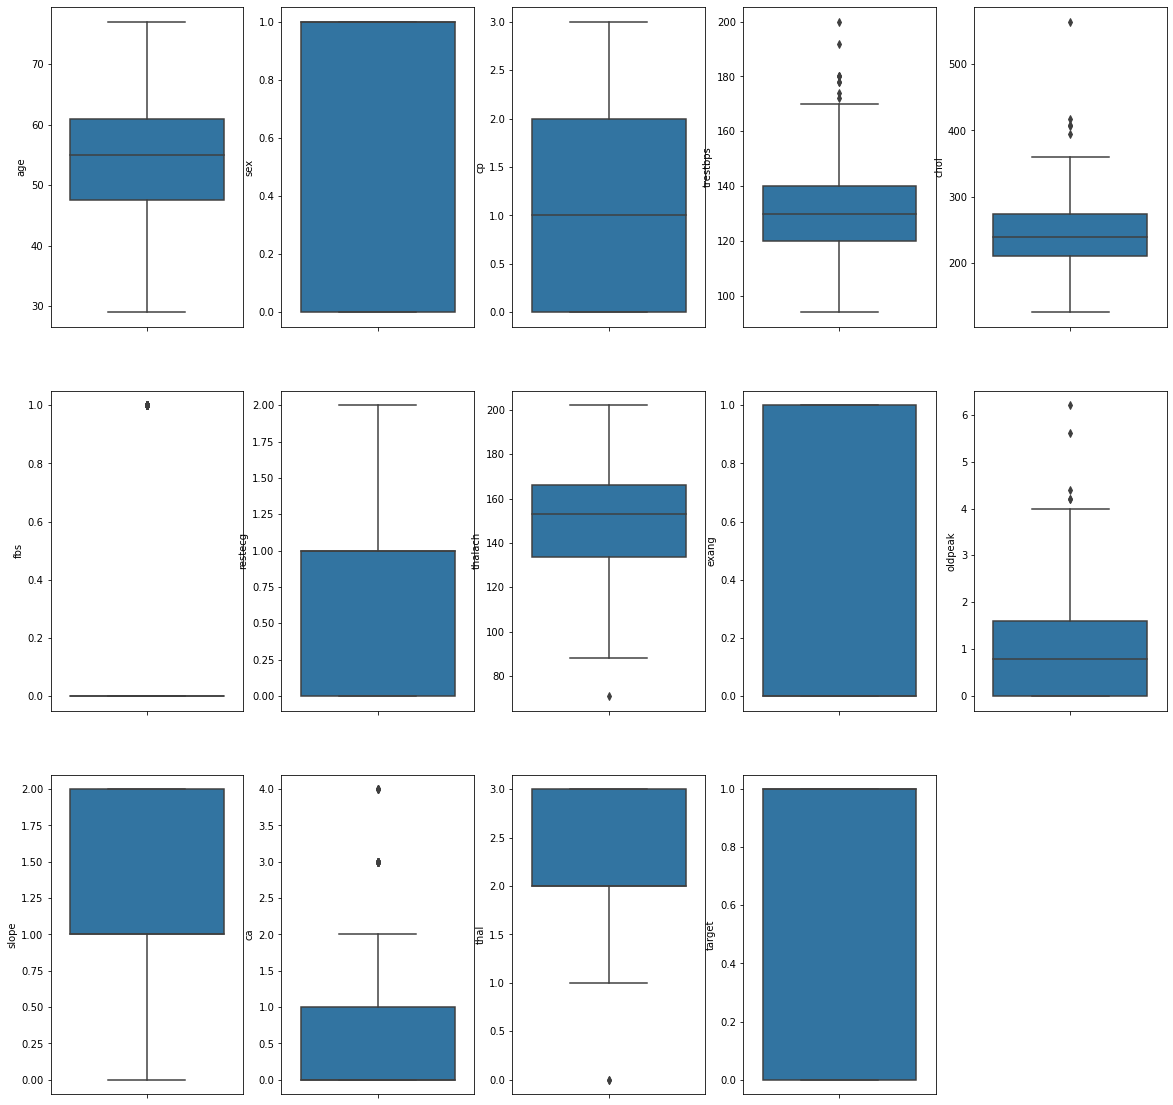

In [15]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,5,index)
        sns.boxplot(y=feature,data=df)
plt.show()

In [16]:
df["fbs"].unique()

array([1, 0], dtype=int64)

In [17]:
df.fbs.value_counts(dropna=False)

0    258
1     45
Name: fbs, dtype: int64

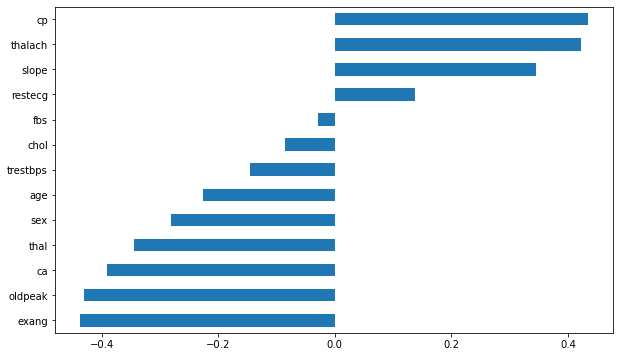

In [18]:
df.corr()["target"].drop("target").sort_values().plot.barh();

# Data Preprocessing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
X = df.drop(columns ="target")
y = df["target"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
print("Data Frame shape     : ", df.shape)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Data Frame shape     :  (303, 14)
Train features shape :  (242, 13)
Train target shape   :  (242,)
Test features shape  :  (61, 13)
Test target shape    :  (61,)


# Implement Logistic Regression and Evaluate

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_model=LogisticRegression()

In [27]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
y_pred=log_model.predict(X_test_scaled)

In [29]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [30]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
264,54,1,0,110,206,0,0,108,1,0.000,1,1,2,0,0,0.120
236,58,1,0,125,300,0,0,171,0,0.000,2,2,3,0,0,0.172
285,46,1,0,140,311,0,1,120,1,1.800,1,2,3,0,0,0.006
107,45,0,0,138,236,0,0,152,1,0.200,1,0,2,1,1,0.606
293,67,1,2,152,212,0,0,150,0,0.800,1,0,3,0,1,0.622
160,56,1,1,120,240,0,1,169,0,0.000,0,0,2,1,1,0.817
141,43,1,0,115,303,0,1,181,0,1.200,1,0,2,1,1,0.547
267,49,1,2,118,149,0,0,126,0,0.800,2,3,2,0,1,0.689
194,60,1,2,140,185,0,0,155,0,3.000,1,0,2,0,1,0.722
185,44,1,0,112,290,0,0,153,0,0.000,2,1,2,0,0,0.443


In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    global y_train_pred
    y_train_pred = model.predict(X_train)
    global y_pred
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [33]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[19  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set

[[ 85  25]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       110
           1       0.83      0.90      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242



In [34]:
logistic_confusion_matrix= confusion_matrix(y_train, y_train_pred)
logistic_confusion_matrix

array([[ 85,  25],
       [ 13, 119]], dtype=int64)

## With Grid

In [35]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]

C = np.logspace(-1, 5, 20)

class_weight= ["balanced", None] 

solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight, 
              "solver":solver}


grid_logistic_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall", n_jobs = -1)

In [36]:
grid_logistic_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [37]:
grid_logistic_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

In [38]:
eval_metric(grid_logistic_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[18 10]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61


Train_Set

[[ 86  24]
 [ 11 121]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       110
           1       0.83      0.92      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242



In [39]:
logistic_grid_confusion_matrix = confusion_matrix(y_train, y_train_pred)
logistic_grid_confusion_matrix

array([[ 86,  24],
       [ 11, 121]], dtype=int64)

In [40]:
logistic_grid_test_confusion_matrix = confusion_matrix(y_test, y_pred)
logistic_grid_test_confusion_matrix

array([[18, 10],
       [ 1, 32]], dtype=int64)

## Finding Best Threshold for max recall score

In [41]:
from sklearn.metrics import roc_auc_score, auc, roc_curve, average_precision_score

In [42]:
y_pred_proba = log_model.predict_proba(X_train_scaled) #
roc_auc_score(y_train, y_pred_proba[:,1])

0.9279614325068871

In [43]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [44]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.598181635122485

In [45]:
y_pred2 = pd.Series(grid_logistic_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [46]:
y_train_pred2 = pd.Series(grid_logistic_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[ 92  18]
 [ 21 111]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       110
           1       0.86      0.84      0.85       132

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



In [47]:
optimal_threshold_confusion_matrix = confusion_matrix(y_train, y_train_pred2)
optimal_threshold_confusion_matrix

array([[ 92,  18],
       [ 21, 111]], dtype=int64)

# Implement KNN and Evaluate

In [48]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier

In [49]:
test_error_rates = []


for k in range(1,30): 
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
    y_train_pred = knn_model.predict(X_train)
    y_pred = knn_model.predict(X_test)
    y_pred_test = knn_model.predict(X_test_scaled)
    
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)
    

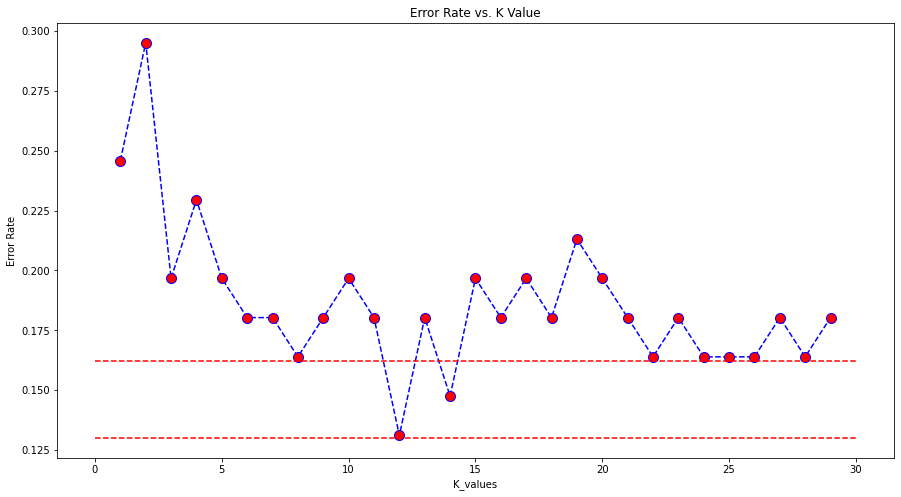

In [50]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.13, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.162, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [51]:
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train_scaled,y_train)
print('WITH K=12\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=12

Test_Set

[[22  6]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61


Train_Set

[[ 91  19]
 [ 16 116]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       110
           1       0.86      0.88      0.87       132

    accuracy                           0.86       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



In [52]:
knn_confusion_matrix = confusion_matrix(y_train, y_train_pred)
knn_confusion_matrix

array([[ 91,  19],
       [ 16, 116]], dtype=int64)

In [53]:
knn_test_confusion_matrix = confusion_matrix(y_test, y_pred)
knn_test_confusion_matrix

array([[22,  6],
       [ 2, 31]], dtype=int64)

# Visually compare models based on your chosen metric

In [54]:
print (f"logistic_grid_confusion_matrix :\n{logistic_grid_confusion_matrix}")
print (f"logistic_grid_test_confusion_matrix :\n{logistic_grid_test_confusion_matrix}")
print (f"logistic_confusion_matrix :\n{logistic_confusion_matrix}")
print (f"knn_confusion_matrix :\n{knn_confusion_matrix}")
print (f"knn_test_confusion_matrix :\n{knn_test_confusion_matrix}")
print (f"optimal_threshold_confusion_matrix :\n{optimal_threshold_confusion_matrix}")

logistic_grid_confusion_matrix :
[[ 86  24]
 [ 11 121]]
logistic_grid_test_confusion_matrix :
[[18 10]
 [ 1 32]]
logistic_confusion_matrix :
[[ 85  25]
 [ 13 119]]
knn_confusion_matrix :
[[ 91  19]
 [ 16 116]]
knn_test_confusion_matrix :
[[22  6]
 [ 2 31]]
optimal_threshold_confusion_matrix :
[[ 92  18]
 [ 21 111]]


# Chose best model and make a random prediction 

In [55]:
scaler = StandardScaler().fit(X)

In [56]:
import pickle
pickle.dump(scaler, open("heart_stroke", 'wb'))

In [57]:
X_scaled = scaler.transform(X)

In [58]:
grid_logistic_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

In [59]:
final_model = final_model = LogisticRegression(C= 0.1, class_weight= None, penalty= 'l1',solver= 'saga').fit(X_scaled, y)

In [60]:
pickle.dump(final_model, open("final_model_heart_stroke", 'wb'))

In [61]:
my_dict = {"age": [62, 72, 49, 65, 63],
           "sex": [0, 0, 0, 1, 0],
           "cp": [0, 1, 0, 0, 0],
           "trestbps": [132, 162, 131, 183, 123],
           "chol": [335, 307, 260, 328, 270],
           "fbs": [0, 0, 1, 0, 0],
           "restecg": [0, 1, 0, 1, 1],
           "thalach": [167, 160, 145, 150, 95],
           "exang": [0, 0, 1, 1, 1],
           "oldpeak": [0, 0.4, 0, 0, 1.8],
           "slope": [2, 2, 2, 2, 1],
           "ca": [0, 2, 2, 0, 2],
           "thal": [2, 2, 3, 2, 3]
          }

In [62]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,62,0,0,132,335,0,0,167,0,0.000,2,0,2
1,72,0,1,162,307,0,1,160,0,0.400,2,2,2
2,49,0,0,131,260,1,0,145,1,0.000,2,2,3
3,65,1,0,183,328,0,1,150,1,0.000,2,0,2
4,63,0,0,123,270,0,1,95,1,1.800,1,2,3


In [63]:
scaler_heart_stroke = pickle.load(open("heart_stroke", "rb"))

In [64]:
sample_scaled = scaler_heart_stroke.transform(sample)
sample_scaled

array([[ 0.84190778, -1.46841752, -0.93851463,  0.02148802,  1.71486549,
        -0.41763453, -1.00583187,  0.75886137, -0.69663055, -0.89686172,
         0.97635214, -0.71442887, -0.51292188],
       [ 1.94479604, -1.46841752,  0.03203122,  1.73487513,  1.17375198,
        -0.41763453,  0.89896224,  0.45274783, -0.69663055, -0.55178349,
         0.97635214,  1.24459328, -0.51292188],
       [-0.59184697, -1.46841752, -0.93851463, -0.03562488,  0.26545431,
         2.394438  , -1.00583187, -0.20320974,  1.43548113, -0.89686172,
         0.97635214,  1.24459328,  1.12302895],
       [ 1.17277425,  0.68100522, -0.93851463,  2.93424611,  1.57958711,
        -0.41763453,  0.89896224,  0.01544279,  1.43548113, -0.89686172,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.9521966 , -1.46841752, -0.93851463, -0.49252811,  0.45870914,
        -0.41763453,  0.89896224, -2.38973499,  1.43548113,  0.65599028,
        -0.64911323,  1.24459328,  1.12302895]])

In [65]:
final_model = pickle.load(open("final_model_heart_stroke", "rb"))

In [66]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [67]:
optimal_threshold

0.598181635122485

In [68]:
sample["pred_proba"] = predictions_proba[:,1]
sample["prediction"] = predictions
sample["pred_0.59"] = predictions2
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred_proba,prediction,pred_0.59
0,62,0,0,132,335,0,0,167,0,0.000,2,0,2,0.844,1,1
1,72,0,1,162,307,0,1,160,0,0.400,2,2,2,0.722,1,1
2,49,0,0,131,260,1,0,145,1,0.000,2,2,3,0.311,0,0
3,65,1,0,183,328,0,1,150,1,0.000,2,0,2,0.463,0,0
4,63,0,0,123,270,0,1,95,1,1.800,1,2,3,0.088,0,0
